<a href="https://colab.research.google.com/github/nitinlodhi019/Machine-Learning/blob/main/DBSCAN/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DBSCAN
DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.


**epsilon**: -- It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors. If the eps value is chosen too small then a large part of the data will be considered as an outlier. If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.

**MinPts**:-- Minimum number of neighbors (data points) within eps radius.

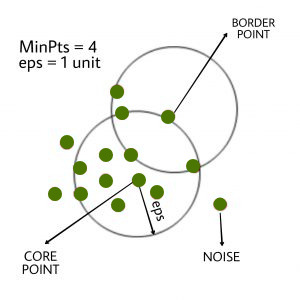

**Core Point:--** A point is a core point if it has more than MinPts points within eps.

**Border Point:--** A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.

**Noise or outlier:--** A point which is not a core point or border point.


##DBSCAN
we cannot predict in this algorithm

In [3]:
 from sklearn.cluster import DBSCAN
 import numpy as np
 import matplotlib.pyplot as plt

In [4]:
X = np.array([[1,2], [2,2], [2,3], [8,7], [8,8], [25,80]])

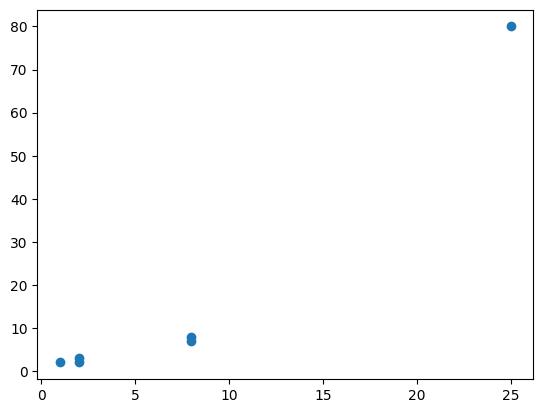

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
db = DBSCAN(eps=3, min_samples=2)
db.fit(X)
db.labels_
# -1 as a outlier

array([ 0,  0,  0,  1,  1, -1])

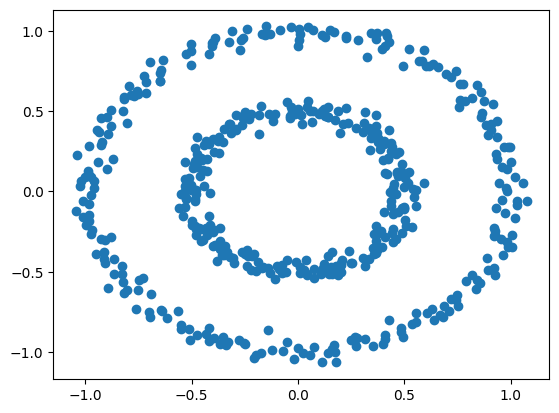

In [49]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=500, factor=.5, noise=.04, random_state=4)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [59]:
db = DBSCAN(eps=0.15, min_samples=4)
clusters = db.fit_predict(X)


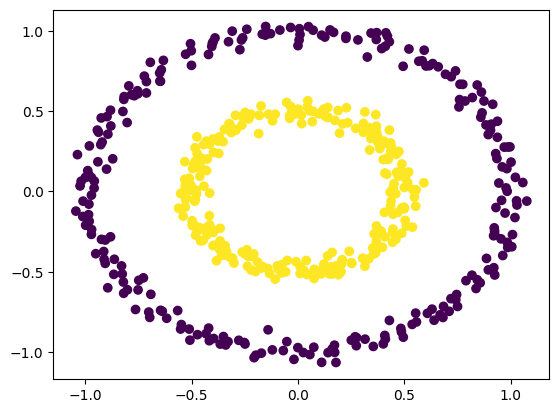

In [60]:

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

In [61]:
db.labels_

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

##K-means Vs DBSCAN

In [64]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('/content/Clustering_gmm (2).csv')

<Axes: xlabel='Weight', ylabel='Height'>

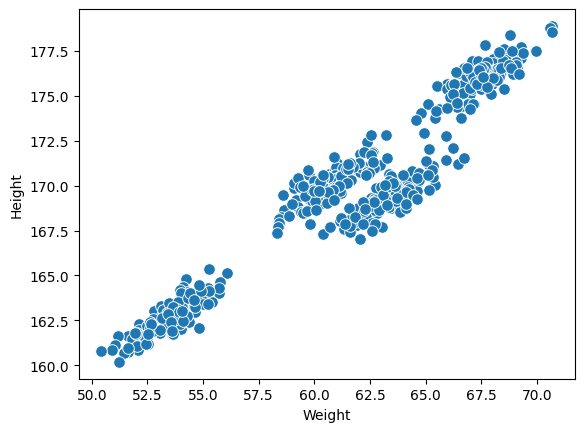

In [65]:
sns.scatterplot(data=data,x='Weight',y='Height',s=70)


In [68]:
from sklearn.cluster import KMeans

In [69]:
def display_model (data , clustering_algorithme='K-means',eps_=0.5,min_samples_=5,n_clusters_ = 2) :
    if clustering_algorithme=='K-means' :
        model = KMeans(n_clusters=n_clusters_,n_init=10)
        labels = model.fit_predict(data)
        sns.scatterplot(data=data,x='Weight',y='Height',hue=labels,palette='Set1')
        sns.scatterplot(pd.DataFrame(model.cluster_centers_,columns=['X','Y']),x = 'X',y='Y',marker='s',s=90)
    elif clustering_algorithme=='DBSCAN' :
        model = DBSCAN(eps=eps_,min_samples=min_samples_)
        labels = model.fit_predict(data)
        sns.scatterplot(data=data,x='Weight',y='Height',hue=labels,palette='Set1')
    else :
        print("Error algorithm name !!!!!!!!! ")

###K-means

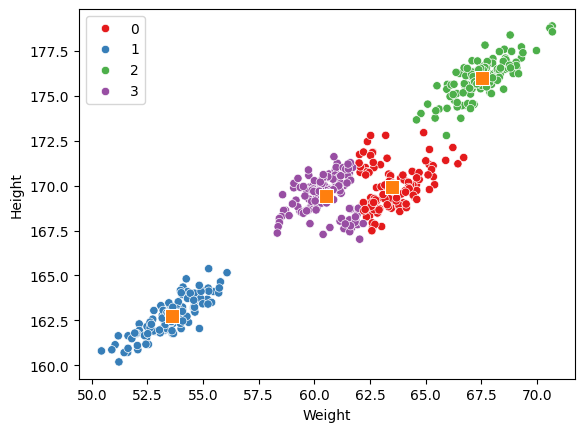

In [72]:
display_model (data , clustering_algorithme='K-means',n_clusters_=4)


###DBSCAN

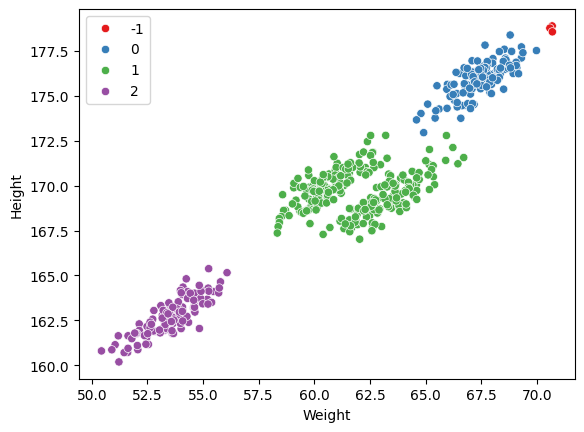

In [73]:
display_model (data , clustering_algorithme='DBSCAN',eps_=1,min_samples_=5)
